In [255]:
%load_ext autoreload
%autoreload 2

from pyshred.processor.data_manager import DataManager
from pyshred.models.sindy_dynamics import SINDyDynamics
from pyshred.models.shred import SHRED
from pyshred.engine.engine import SHREDEngine
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

[autoreload of pyshred.latent_forecaster_models.sindy failed: Traceback (most recent call last):
  File "c:\Tools\MiniConda\envs\datasci\lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Tools\MiniConda\envs\datasci\lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Tools\MiniConda\envs\datasci\lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "c:\Tools\MiniConda\envs\datasci\lib\site-packages\IPython\extensions\autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
  File "c:\Tools\MiniConda\envs\datasci\lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "c:\Tools\MiniConda\envs\datasci\lib\site-packages\IPython\extensions\autoreload.py", line 309, in update_function
    setattr(old, name, getattr(ne

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


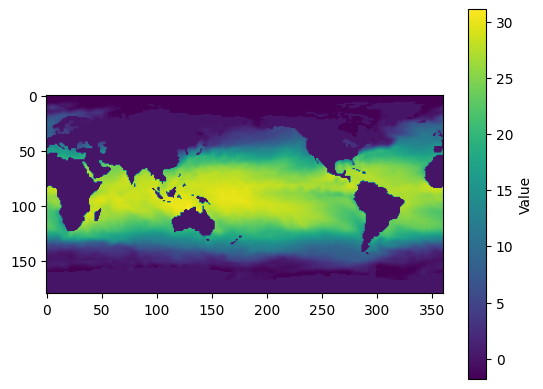

(1400, 180, 360)

In [256]:
mat = loadmat("SST_data.mat")          # load MATLAB file
arr = mat['Z'].T                   # extract the variable you want
arr = arr.reshape(1400, 180, 360)
# # Plotting
plt.figure()
plt.imshow(arr[0]) 
plt.colorbar(label="Value")
plt.show()
arr.shape


In [257]:
manager = DataManager(
    lags = 52,
    train_size = 0.8,
    val_size = 0.1,
    test_size = 0.1,
)

In [258]:
manager.add_data(
    data = arr,
    id = "SST",
    random = 50,
    # stationary = [(46, 227),(120, 60),(134, 303)],
    # measurements=measurements,
    compress=True,
)

In [259]:
datasets = manager.prepare()

In [260]:
datasets[0].Y.shape

torch.Size([1120, 50])

In [261]:
manager.sensor_summary_df

,data id,number,type,loc/traj
0,SST,0,stationary (random),"(161, 3)"
1,SST,1,stationary (random),"(62, 79)"
2,SST,2,stationary (random),"(1, 21)"
3,SST,3,stationary (random),"(162, 257)"
4,SST,4,stationary (random),"(155, 135)"
5,SST,5,stationary (random),"(26, 106)"
6,SST,6,stationary (random),"(19, 167)"
7,SST,7,stationary (random),"(17, 177)"
8,SST,8,stationary (random),"(68, 152)"
9,SST,9,stationary (random),"(13, 31)"


In [262]:
manager.sensor_measurements_df

data id,SST-0,SST-1,SST-2,SST-3,SST-4,SST-5,SST-6,SST-7,SST-8,SST-9,...,SST-40,SST-41,SST-42,SST-43,SST-44,SST-45,SST-46,SST-47,SST-48,SST-49
0,-0.0,0.0,-1.8,-1.80,-0.06,0.0,-1.79,-1.80,26.369999,0.02,...,-1.72,7.62,0.0,27.049999,0.0,-0.0,18.81,27.299999,23.659999,-0.0
1,-0.0,0.0,-1.8,-1.80,-0.01,0.0,-1.79,-1.80,25.819999,0.47,...,-1.61,8.18,0.0,26.609999,0.0,-0.0,19.20,27.209999,23.279999,-0.0
2,-0.0,0.0,-1.8,-1.61,-0.07,0.0,-1.79,-1.80,25.359999,0.66,...,-1.38,8.37,0.0,26.719999,0.0,-0.0,20.80,27.709999,24.139999,-0.0
3,-0.0,0.0,-1.8,-1.24,0.04,0.0,-1.79,-1.80,25.399999,0.73,...,-1.24,8.24,0.0,26.839999,0.0,-0.0,21.29,27.799999,23.899999,-0.0
4,-0.0,0.0,-1.8,-1.15,0.56,0.0,-1.79,-1.80,24.859999,0.26,...,-1.15,8.12,0.0,26.649999,0.0,-0.0,21.30,27.349999,24.629999,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,-0.0,0.0,-1.8,-1.44,-1.80,0.0,1.62,0.35,28.869999,5.21,...,-1.80,7.08,0.0,26.129999,0.0,-0.0,17.52,25.519999,21.040000,-0.0
1396,-0.0,0.0,-1.8,-1.44,-1.75,0.0,1.01,0.00,28.909999,4.71,...,-1.76,7.41,0.0,26.199999,0.0,-0.0,16.89,26.359999,21.140000,-0.0
1397,-0.0,0.0,-1.8,-1.27,-1.69,0.0,0.99,0.60,28.619999,4.33,...,-1.69,7.08,0.0,26.459999,0.0,-0.0,17.19,26.709999,21.010000,-0.0
1398,-0.0,0.0,-1.8,-1.40,-1.77,0.0,0.83,0.68,28.709999,3.57,...,-1.80,7.32,0.0,26.499999,0.0,-0.0,17.59,26.999999,21.180000,-0.0


In [268]:
from pyshred.models import sindy_shred
from pyshred.latent_forecaster_models.sindy import SINDy_Forecaster

# dyn = SINDyDynamics(poly_order=1, include_sine=True, dt=1/52)
latent_forecaster = SINDy_Forecaster(poly_order=1, include_sine=True, dt=1/5)
shred = sindy_shred.SINDy_SHRED(sequence_model="GRU", decoder_model="SDN", latent_forecaster=latent_forecaster)

In [269]:
val_errors = shred.fit(train_dataset=datasets[0], val_dataset=datasets[1], num_epochs=2, thres_epoch=20, sindy_regularization=1)

Fitting SindySHRED...
Epoch 1: Average training loss = 0.061574
Training epoch 1
Error tensor(0.0276)
Epoch 2: Average training loss = 0.028400
Training epoch 2
Error tensor(0.0193)


In [284]:
shred.latent_forecaster.model.print()

(x0)' = 0.087 1 + -0.098 x0 + 0.183 x1 + 0.393 x2
(x1)' = 0.346 1 + -0.261 x0 + 0.287 x1 + 1.060 x2
(x2)' = 0.101 1 + 0.059 x0 + -0.335 x1 + -0.184 x2


In [285]:
manager.val_sensor_measurements.shape

(140, 50)

In [287]:
engine = SHREDEngine(manager, shred)
latent = engine.sensor_to_latent(manager.val_sensor_measurements)
latent = latent[-1]
# recon = engine.decode(latents = latent)
# recon

In [288]:
forecasted_latents = engine.forecast_latent(200, latent)

In [290]:
forecasted_recon = engine.decode(forecasted_latents)

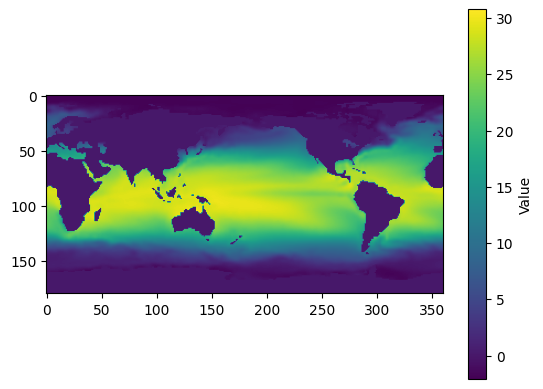

In [291]:
plt.figure()
plt.imshow(forecasted_recon['SST'][0]) 
plt.colorbar(label="Value")
plt.show()

In [42]:
val_errors

array([0.02285842, 0.02113066], dtype=float32)

In [16]:
shred.latent_forecaster.print()

(x0)' = -3.916 1 + -0.334 x0 + -2.675 x1 + 2.536 x2
(x1)' = -1.413 1 + -0.005 x0 + -1.707 x1 + -0.101 x2
(x2)' = -0.364 1 + -0.598 x0 + -0.439 x1 + 0.185 x2


In [17]:
# Rate of sparsity
torch.mean(shred.e_sindy.coefficient_mask*1.0)

tensor(1.)

In [18]:
test_recons = (shred(datasets[2].X).detach().cpu().numpy())
test_ground_truth = (datasets[2].Y.detach().cpu().numpy())
print(np.linalg.norm(test_recons - test_ground_truth) / np.linalg.norm(test_ground_truth))

0.44390455


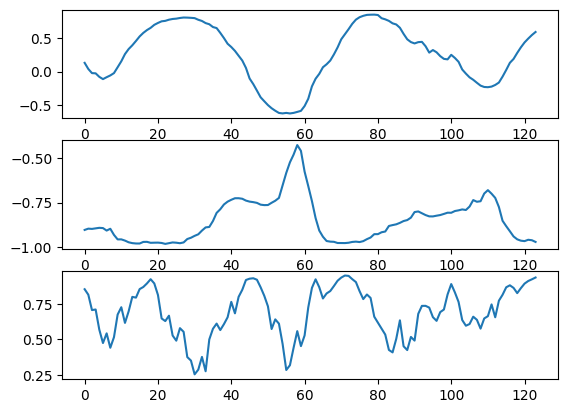

In [20]:

import matplotlib.pyplot as plt
import pysindy as ps
from pysindy.differentiation import FiniteDifference
gru_outs, sindy_outs = shred.gru_outputs(datasets[2].X, sindy=True)
differentiation_method = FiniteDifference()

latent_dim = 3
fig, ax = plt.subplots(latent_dim)
for i in range(latent_dim):
    ax[i].plot(gru_outs[1:,0,i].detach().cpu().numpy())

(x0)' = -1.545 1 + -0.482 x0 + -1.920 x1 + 1.544 x2
(x1)' = -0.252 1 + 0.541 x0 + 0.003 x1 + 0.209 x2
(x2)' = -0.440 1 + -0.929 x0 + -0.770 x1 + 0.297 x2


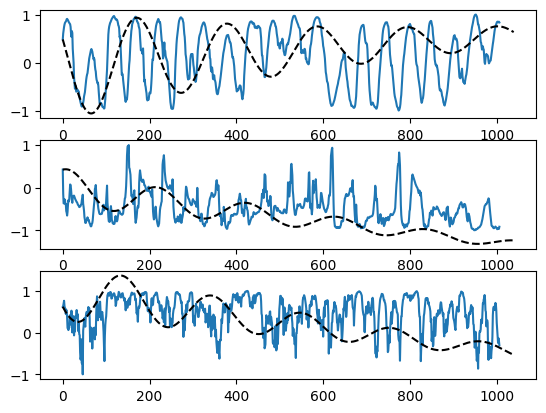

In [21]:
gru_outs, sindy_outs = shred.gru_outputs(datasets[0].X, sindy=True)
gru_outs = gru_outs[:,0,:]

poly_order = 1
threshold = 0.05

###############Normalization###############

gru_outs[:,0] = (gru_outs[:,0] - torch.min(gru_outs[:,0])) / (torch.max(gru_outs[:,0])-torch.min(gru_outs[:,0]))
gru_outs[:,1] = (gru_outs[:,1] - torch.min(gru_outs[:,1])) / (torch.max(gru_outs[:,1])-torch.min(gru_outs[:,1]))
gru_outs[:,2] = (gru_outs[:,2] - torch.min(gru_outs[:,2])) / (torch.max(gru_outs[:,2])-torch.min(gru_outs[:,2]))

gru_outs = 2 * gru_outs - 1

###############SINDy discovery###############

x = gru_outs.detach().cpu().numpy()

differentiation_method = ps.differentiation.FiniteDifference()
# differentiation_method = ps.differentiation.SmoothedFiniteDifference()

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=0.0, alpha=0.05),
    differentiation_method=differentiation_method,
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)

# model = ps.SINDy(
#     optimizer=ps.MIOSR(group_sparsity=(2,2,2), alpha=5000),
#     differentiation_method=differentiation_method,
#     feature_library=ps.PolynomialLibrary(degree=poly_order),
# )
import math
import numpy as np
np.math = math

t_points = np.arange(0, len(x)) * (1/52.0)
model.fit(x, t=t_points)
model.print()


###############Plot the discovered SINDy model###############

t_train = np.arange(0, 20, 1/52.0)
init_cond = np.zeros(latent_dim)
init_cond[:latent_dim] = gru_outs[0,:].detach().cpu().numpy()
x_sim = model.simulate(init_cond, t_train)

fig, ax = plt.subplots(latent_dim)
for i in range(latent_dim):
    ax[i].plot(gru_outs[:,i].detach().cpu().numpy())
    ax[i].plot(x_sim[:,i], "k--", label="model")

In [74]:
dyn = SINDyDynamics(latent_dim=3, poly_order=1, include_sine=True, dt=1/52)
# model = SHRED(sequence_model="LSTM", decoder_model="SDN", dynamics=dyn, lambda_dyn=1e-3)
model = SHRED(dynamics=dyn, lambda_dyn=1e-3)

In [ ]:
SHREDEngine

In [78]:
model.fit(train_dataset=datasets[0], val_dataset=datasets[1], num_epochs=50, sindy=False)

Epoch 1/50: 100%|██████████| 16/16 [00:00<00:00, 70.01batch/s, loss=0.0546, L2=12.3]


Epoch 1: train_loss=0.0546, train_L2=12.2810, val_L2=12.4313


Epoch 2/50: 100%|██████████| 16/16 [00:00<00:00, 67.23batch/s, loss=0.0219, L2=8.29]


Epoch 2: train_loss=0.0219, train_L2=8.2923, val_L2=10.0076


Epoch 3/50: 100%|██████████| 16/16 [00:00<00:00, 66.69batch/s, loss=0.019, L2=7.74]


Epoch 3: train_loss=0.0190, train_L2=7.7400, val_L2=9.4974


Epoch 4/50: 100%|██████████| 16/16 [00:00<00:00, 65.74batch/s, loss=0.0181, L2=7.55]


Epoch 4: train_loss=0.0181, train_L2=7.5483, val_L2=9.3843


Epoch 5/50: 100%|██████████| 16/16 [00:00<00:00, 52.70batch/s, loss=0.0176, L2=7.44]


Epoch 5: train_loss=0.0176, train_L2=7.4379, val_L2=9.3183


Epoch 6/50: 100%|██████████| 16/16 [00:00<00:00, 65.91batch/s, loss=0.0173, L2=7.37]


Epoch 6: train_loss=0.0173, train_L2=7.3686, val_L2=9.2503


Epoch 7/50: 100%|██████████| 16/16 [00:00<00:00, 60.92batch/s, loss=0.017, L2=7.32]


Epoch 7: train_loss=0.0170, train_L2=7.3178, val_L2=9.2320


Epoch 8/50: 100%|██████████| 16/16 [00:00<00:00, 67.83batch/s, loss=0.0169, L2=7.29]


Epoch 8: train_loss=0.0169, train_L2=7.2888, val_L2=9.1891


Epoch 9/50: 100%|██████████| 16/16 [00:00<00:00, 53.49batch/s, loss=0.0167, L2=7.25]


Epoch 9: train_loss=0.0167, train_L2=7.2472, val_L2=9.1751


Epoch 10/50: 100%|██████████| 16/16 [00:00<00:00, 73.24batch/s, loss=0.0167, L2=7.24]


Epoch 10: train_loss=0.0167, train_L2=7.2371, val_L2=9.1924


Epoch 11/50: 100%|██████████| 16/16 [00:00<00:00, 65.06batch/s, loss=0.0164, L2=7.19]


Epoch 11: train_loss=0.0164, train_L2=7.1870, val_L2=9.1793


Epoch 12/50: 100%|██████████| 16/16 [00:00<00:00, 73.26batch/s, loss=0.0164, L2=7.18]


Epoch 12: train_loss=0.0164, train_L2=7.1844, val_L2=9.1505


Epoch 13/50: 100%|██████████| 16/16 [00:00<00:00, 64.56batch/s, loss=0.0163, L2=7.17]


Epoch 13: train_loss=0.0163, train_L2=7.1706, val_L2=9.1131


Epoch 14/50: 100%|██████████| 16/16 [00:00<00:00, 72.89batch/s, loss=0.0162, L2=7.13]


Epoch 14: train_loss=0.0162, train_L2=7.1256, val_L2=9.0966


Epoch 15/50: 100%|██████████| 16/16 [00:00<00:00, 66.39batch/s, loss=0.016, L2=7.09]


Epoch 15: train_loss=0.0160, train_L2=7.0923, val_L2=9.0784


Epoch 16/50: 100%|██████████| 16/16 [00:00<00:00, 70.62batch/s, loss=0.016, L2=7.08]


Epoch 16: train_loss=0.0160, train_L2=7.0833, val_L2=9.0819


Epoch 17/50: 100%|██████████| 16/16 [00:00<00:00, 64.84batch/s, loss=0.0159, L2=7.06]


Epoch 17: train_loss=0.0159, train_L2=7.0557, val_L2=9.0337


Epoch 18/50: 100%|██████████| 16/16 [00:00<00:00, 69.71batch/s, loss=0.0158, L2=7.05]


Epoch 18: train_loss=0.0158, train_L2=7.0488, val_L2=9.0561


Epoch 19/50: 100%|██████████| 16/16 [00:00<00:00, 65.40batch/s, loss=0.0157, L2=7.02]


Epoch 19: train_loss=0.0157, train_L2=7.0211, val_L2=9.0006


Epoch 20/50: 100%|██████████| 16/16 [00:00<00:00, 72.35batch/s, loss=0.0155, L2=6.97]


Epoch 20: train_loss=0.0155, train_L2=6.9707, val_L2=8.9932


Epoch 21/50: 100%|██████████| 16/16 [00:00<00:00, 60.38batch/s, loss=0.0154, L2=6.95]


Epoch 21: train_loss=0.0154, train_L2=6.9505, val_L2=8.9025


Epoch 22/50: 100%|██████████| 16/16 [00:00<00:00, 69.67batch/s, loss=0.0152, L2=6.9]


Epoch 22: train_loss=0.0152, train_L2=6.9046, val_L2=8.8482


Epoch 23/50: 100%|██████████| 16/16 [00:00<00:00, 68.26batch/s, loss=0.0151, L2=6.88]


Epoch 23: train_loss=0.0151, train_L2=6.8809, val_L2=8.8142


Epoch 24/50: 100%|██████████| 16/16 [00:00<00:00, 72.22batch/s, loss=0.0149, L2=6.86]


Epoch 24: train_loss=0.0149, train_L2=6.8569, val_L2=8.8829


Epoch 25/50: 100%|██████████| 16/16 [00:00<00:00, 66.57batch/s, loss=0.0149, L2=6.85]


Epoch 25: train_loss=0.0149, train_L2=6.8456, val_L2=8.7403


Epoch 26/50: 100%|██████████| 16/16 [00:00<00:00, 70.64batch/s, loss=0.0147, L2=6.8]


Epoch 26: train_loss=0.0147, train_L2=6.7975, val_L2=8.6967


Epoch 27/50: 100%|██████████| 16/16 [00:00<00:00, 65.66batch/s, loss=0.0147, L2=6.8]


Epoch 27: train_loss=0.0147, train_L2=6.8037, val_L2=8.7119


Epoch 28/50: 100%|██████████| 16/16 [00:00<00:00, 73.01batch/s, loss=0.0146, L2=6.78]


Epoch 28: train_loss=0.0146, train_L2=6.7782, val_L2=8.7127


Epoch 29/50: 100%|██████████| 16/16 [00:00<00:00, 62.30batch/s, loss=0.0146, L2=6.77]


Epoch 29: train_loss=0.0146, train_L2=6.7657, val_L2=8.7034


Epoch 30/50: 100%|██████████| 16/16 [00:00<00:00, 64.79batch/s, loss=0.0145, L2=6.76]


Epoch 30: train_loss=0.0145, train_L2=6.7558, val_L2=8.6558


Epoch 31/50: 100%|██████████| 16/16 [00:00<00:00, 66.02batch/s, loss=0.0145, L2=6.75]


Epoch 31: train_loss=0.0145, train_L2=6.7506, val_L2=8.6818


Epoch 32/50: 100%|██████████| 16/16 [00:00<00:00, 66.93batch/s, loss=0.0146, L2=6.76]


Epoch 32: train_loss=0.0146, train_L2=6.7593, val_L2=8.6262


Epoch 33/50: 100%|██████████| 16/16 [00:00<00:00, 61.33batch/s, loss=0.0143, L2=6.71]


Epoch 33: train_loss=0.0143, train_L2=6.7097, val_L2=8.6649


Epoch 34/50: 100%|██████████| 16/16 [00:00<00:00, 66.63batch/s, loss=0.0143, L2=6.71]


Epoch 34: train_loss=0.0143, train_L2=6.7104, val_L2=8.6515


Epoch 35/50: 100%|██████████| 16/16 [00:00<00:00, 60.94batch/s, loss=0.0144, L2=6.71]


Epoch 35: train_loss=0.0144, train_L2=6.7146, val_L2=8.6125


Epoch 36/50: 100%|██████████| 16/16 [00:00<00:00, 66.13batch/s, loss=0.0143, L2=6.7]


Epoch 36: train_loss=0.0143, train_L2=6.7007, val_L2=8.6881


Epoch 37/50: 100%|██████████| 16/16 [00:00<00:00, 60.19batch/s, loss=0.0142, L2=6.67]


Epoch 37: train_loss=0.0142, train_L2=6.6716, val_L2=8.6208


Epoch 38/50: 100%|██████████| 16/16 [00:00<00:00, 64.55batch/s, loss=0.0142, L2=6.68]


Epoch 38: train_loss=0.0142, train_L2=6.6750, val_L2=8.5853


Epoch 39/50: 100%|██████████| 16/16 [00:00<00:00, 58.55batch/s, loss=0.0143, L2=6.69]


Epoch 39: train_loss=0.0143, train_L2=6.6852, val_L2=8.5775


Epoch 40/50: 100%|██████████| 16/16 [00:00<00:00, 69.63batch/s, loss=0.0142, L2=6.68]


Epoch 40: train_loss=0.0142, train_L2=6.6755, val_L2=8.5982


Epoch 41/50: 100%|██████████| 16/16 [00:00<00:00, 59.91batch/s, loss=0.0141, L2=6.65]


Epoch 41: train_loss=0.0141, train_L2=6.6520, val_L2=8.5704


Epoch 42/50: 100%|██████████| 16/16 [00:00<00:00, 71.80batch/s, loss=0.0141, L2=6.65]


Epoch 42: train_loss=0.0141, train_L2=6.6495, val_L2=8.5851


Epoch 43/50: 100%|██████████| 16/16 [00:00<00:00, 65.12batch/s, loss=0.0139, L2=6.61]


Epoch 43: train_loss=0.0139, train_L2=6.6098, val_L2=8.5939


Epoch 44/50: 100%|██████████| 16/16 [00:00<00:00, 71.58batch/s, loss=0.014, L2=6.63]


Epoch 44: train_loss=0.0140, train_L2=6.6265, val_L2=8.5638


Epoch 45/50: 100%|██████████| 16/16 [00:00<00:00, 60.82batch/s, loss=0.014, L2=6.63]


Epoch 45: train_loss=0.0140, train_L2=6.6334, val_L2=8.5792


Epoch 46/50: 100%|██████████| 16/16 [00:00<00:00, 65.09batch/s, loss=0.0139, L2=6.61]


Epoch 46: train_loss=0.0139, train_L2=6.6076, val_L2=8.6176


Epoch 47/50: 100%|██████████| 16/16 [00:00<00:00, 66.78batch/s, loss=0.0138, L2=6.6]


Epoch 47: train_loss=0.0138, train_L2=6.5975, val_L2=8.5107


Epoch 48/50: 100%|██████████| 16/16 [00:00<00:00, 59.27batch/s, loss=0.0138, L2=6.59]


Epoch 48: train_loss=0.0138, train_L2=6.5891, val_L2=8.6032


Epoch 49/50: 100%|██████████| 16/16 [00:00<00:00, 71.22batch/s, loss=0.0138, L2=6.59]


Epoch 49: train_loss=0.0138, train_L2=6.5914, val_L2=8.5687


Epoch 50/50: 100%|██████████| 16/16 [00:00<00:00, 62.63batch/s, loss=0.0138, L2=6.59]

Epoch 50: train_loss=0.0138, train_L2=6.5906, val_L2=8.6283


array([12.43132687, 10.00756454,  9.49737167,  9.38429546,  9.31825066,
        9.2502861 ,  9.23198223,  9.18914604,  9.17513752,  9.19237041,
        9.17928505,  9.1505146 ,  9.11313438,  9.09661674,  9.07842255,
        9.08189487,  9.03371906,  9.05614758,  9.00055695,  8.99321079,
        8.90254116,  8.8481741 ,  8.81416702,  8.88291168,  8.74031639,
        8.69668961,  8.71192074,  8.71265697,  8.70335388,  8.65582848,
        8.68183613,  8.62618351,  8.66485405,  8.651474  ,  8.61249161,
        8.68805027,  8.62082672,  8.58533001,  8.57753754,  8.59822083,
        8.57037926,  8.58507538,  8.59386826,  8.56378174,  8.5791626 ,
        8.61763096,  8.51070213,  8.60322475,  8.56868076,  8.62832928])

In [79]:
dyn.print_equations()

dz0/dt = 0
dz1/dt = 0
dz2/dt = 0
